In [1]:
pip install layoutparser torchvision && pip install "detectron2@git+https://github.com/facebookresearch/detectron2.git@v0.5#egg=detectron2"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.2/19.2 MB 52.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 67.2 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.6/143.6 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 67.1 MB/s eta 0:00:00:00:01
  Created wheel for iopath: filename=iopath-0.1.10-py3-none-any.whl size=31532 sha256=6e2d11dcf6045649fcf42c6cdd4605349a8ef1f202da0d3622c94c2b641de4e6
  Stored in directory: /home/codespace/.cache/pip/wheels/9a/a3/b6/ac0fcd1b4ed5cfeb3db92e6a0e476cfd48ed0df92b91080c1d
Successfully built iopath
  Cloning https://github.com/facebookresearch/detectron2.git (to revision v0.5) to /tmp/pip-install-0bbh8him/detectron2_9cdfeff94f45405db4e22fdf62662b6e
  Running 

In [2]:
import layoutparser as lp

import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np
import cv2

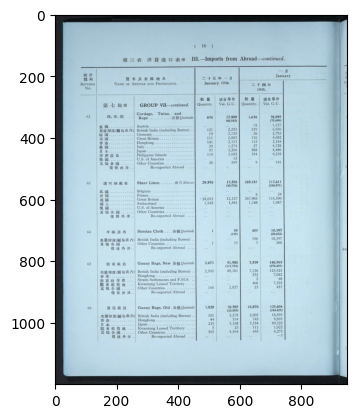

In [5]:
image = cv2.imread('/workspaces/eastd143b-ocr/data/images/table_01.png')
plt.imshow(image)

In [6]:
model = lp.Detectron2LayoutModel('lp://TableBank/faster_rcnn_R_50_FPN_3x/config', label_map = {0: 'Table', 1: 'Figure'})

config.yaml?dl=1: 8.19kB [00:00, 8.37kB/s]
model_final.pth?dl=1: 330MB [00:06, 51.3MB/s]                               
The checkpoint state_dict contains keys that are not used by the model:
  pixel_mean
  pixel_std
  proposal_generator.anchor_generator.cell_anchors.{0, 1, 2, 3, 4}


In [7]:
model.detect(image)

/home/codespace/.python/current/lib/python3.10/site-packages/detectron2/structures/image_list.py:99: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  max_size = (max_size + (stride - 1)) // stride * stride
/home/codespace/.python/current/lib/python3.10/site-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2895.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


Layout(_blocks=[TextBlock(block=Rectangle(x_1=74.7041015625, y_1=168.24984741210938, x_2=782.5623779296875, y_2=1064.851806640625), text=None, id=None, type=Table, parent=None, next=None, score=0.9956150054931641)], page_data={})

In [8]:
ocr_agent = lp.TesseractAgent(languages='eng+chi_tra')

In [9]:
res = text = ocr_agent.detect(image, return_response=True)

In [13]:
print(res)

{'text': '       \n    \n\n第 三\n\n \n\n# PRO Re\n\n \n\n  \n\n16 )\n\nIf.—Imports from Abroad—continued.\n\n \n\n \n \n    \n \n   \n    \n    \n  \n   \n \n    \n   \n  \n    \n   \n \n   \n   \n \n  \n  \n \n \n  \n  \n\n \n\n    \n\nRk a Ge\n其 他 各 國\ni HE Ot Ht\n\n66 am\n\n   \n \n\nE60 19)\nlz\n\n關東 租借 地\n其 他 各 國\n\ni ae\n\n \n   \n  \n \n\n     \n\n \n\n| Kwantung Le\n\n \n\n \n\n \n\n  \n\nan\nma | 貨 名 及 來 源 地 名\nRerumss NAyg or Aricrg ANp PRovEANct\nNo\n$c ML | GROUP VII—continued.\n2 za | Cordage, Twine, and\n@ baal Rope 2H Ouintals\na Austria\n英 屬 印度 ( 棱 名 在 內) British India (including Burma)\n德國 Germany\n英國 Great Britain\n香 浴 Hongkong\naw Italy\n日 本 Japan\nRAG Philippine Islands\n美 國 USS. of America\n其 他 各 國 Other Countries\nA AE Hk HF Re-exported Abroad\n63 | mm amma | Sheer Linen BR Metres\nBelgium\nFrance\nGreat Britain\nSwitzerland\nU.S. of America\n其 他 各 國 Other Countries\ni EO Re-exported Ab\n64 #2 @ MH | Hessian Cloth .... 221 Quintals\n屬 印度 ( 梧 多 在 內 )| British India 

In [11]:
layout = ocr_agent.gather_data(res, agg_level=lp.TesseractFeatureType.WORD)

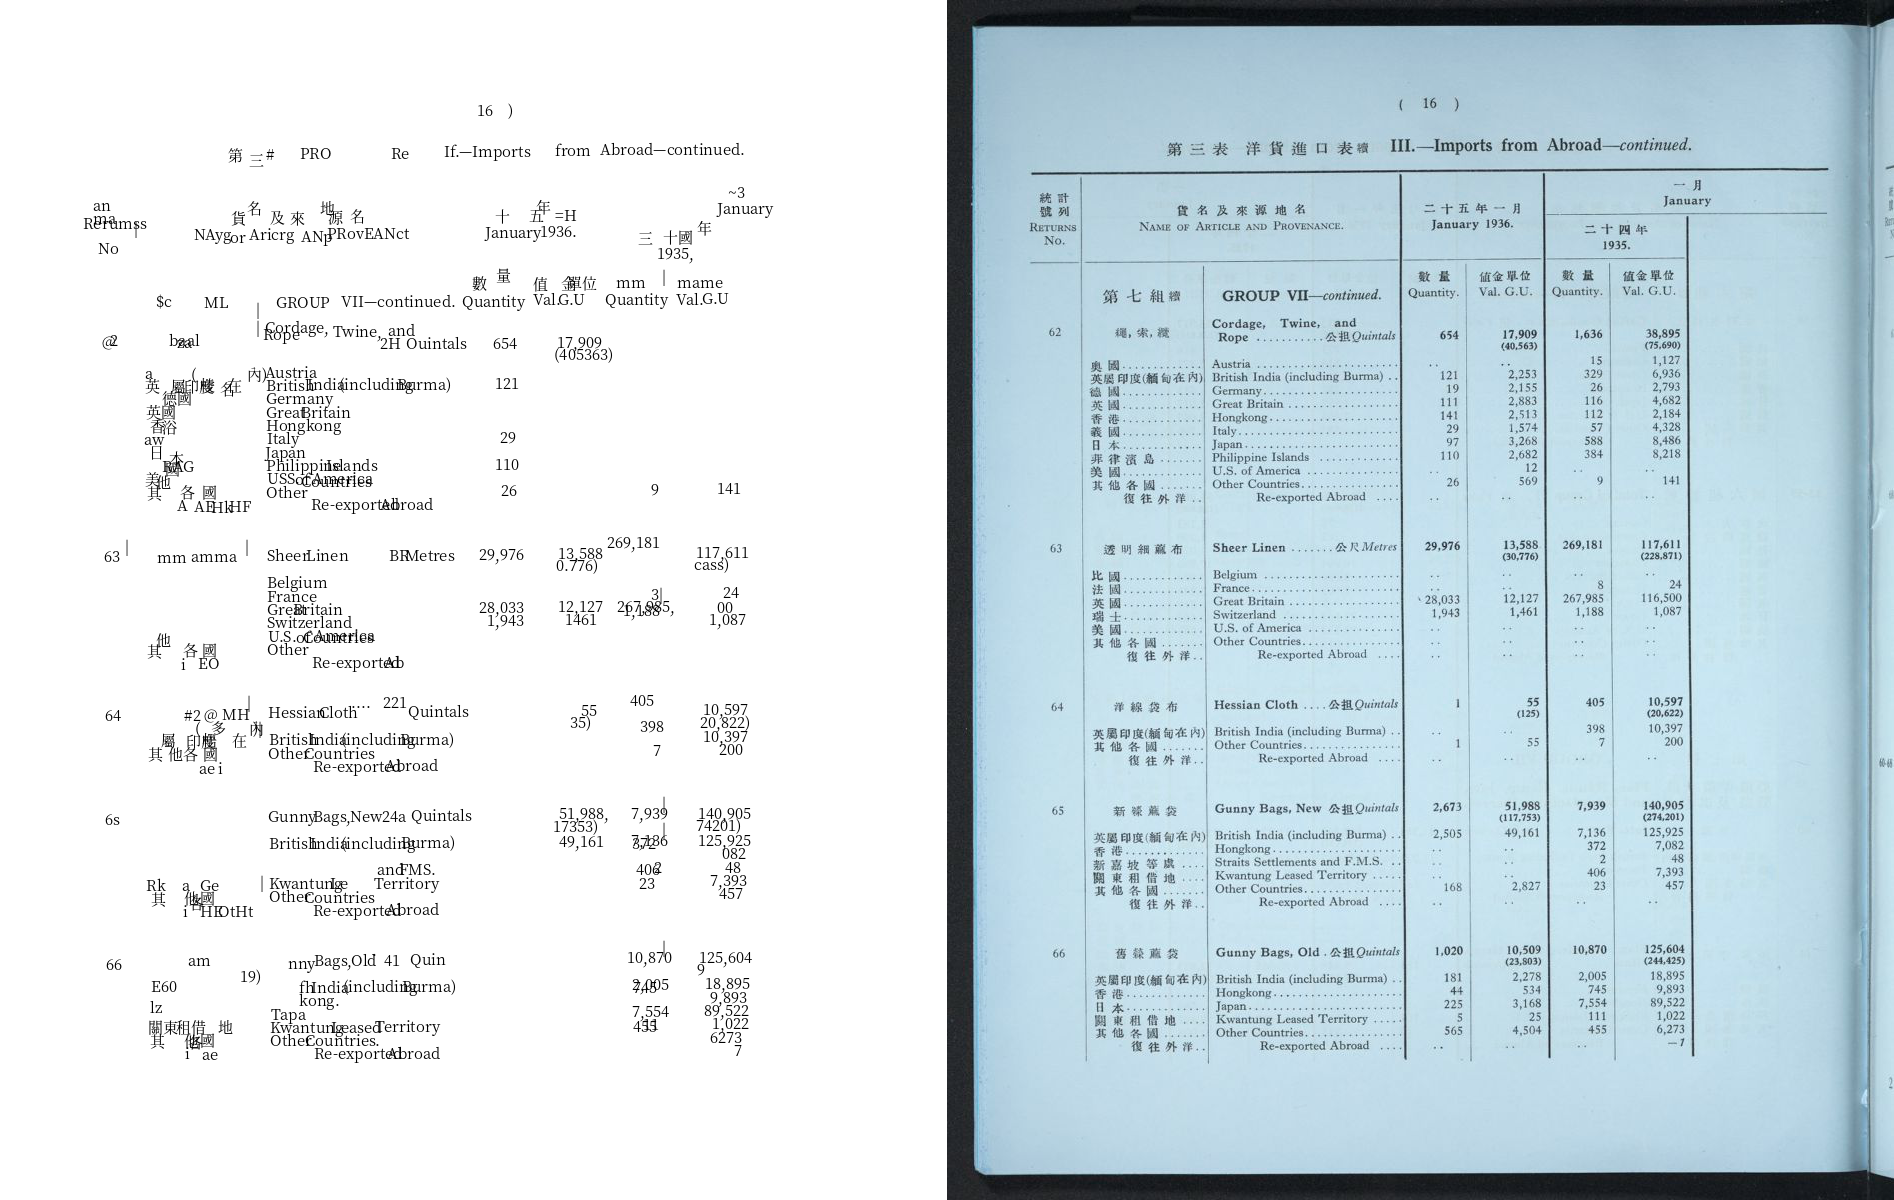

In [12]:
lp.draw_text(image, layout, show_bbox=True)